In [2]:
!pip install boto3 --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 39.8 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.84
    Uninstalling botocore-1.34.84:
      Successfully uninstalled botocore-1.34.84
  Attempting uninstall: boto3
    Found existing installation: boto3 1.34.84
    Uninstalling boto3-1.34.84:
      Successfully uninstalled boto3-1.34.84
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.32.84 requires botocore==1.34.84, but you have botocore 1.34.160 which is incompatible.


In [3]:
!pip install Pillow --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install scikit-learn --upgrade
!pip install psycopg2-binary --upgrade
!pip install requests --upgrade
!pip install requests_aws4auth --upgrade
!pip install pinecone-client --upgrade
!pip install threadpoolctl==3.1.0
!pip install numexpr==2.8.4
!pip install bottleneck==1.3.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.3.0
    Uninstalling pillow-10.3.0:
      Successfully uninstalled pillow-10.3.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 880.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 35.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astropy 6.0.1 requires numpy<2,>=1.22, but you have numpy 2.0.1 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.0.1 which is incompatible.
pyarrow 15.0.2 requires numpy<2,>=1.16.6, but you have numpy 2.0.1 which is 

In [5]:

import boto3

bedrock = boto3.client('bedrock')
response = bedrock.list_foundation_models()
models = response['modelSummaries']
for model in models:
    print(model['modelName'] + '\t' + model['modelId'])

Titan Text Large	amazon.titan-tg1-large
Titan Text Embeddings v2	amazon.titan-embed-g1-text-02
Titan Text G1 - Lite	amazon.titan-text-lite-v1:0:4k
Titan Text G1 - Lite	amazon.titan-text-lite-v1
Titan Text G1 - Express	amazon.titan-text-express-v1:0:8k
Titan Text G1 - Express	amazon.titan-text-express-v1
Titan Embeddings G1 - Text	amazon.titan-embed-text-v1:2:8k
Titan Embeddings G1 - Text	amazon.titan-embed-text-v1
Titan Text Embeddings V2	amazon.titan-embed-text-v2:0:8k
Titan Text Embeddings V2	amazon.titan-embed-text-v2:0
Titan Multimodal Embeddings G1	amazon.titan-embed-image-v1:0
Titan Multimodal Embeddings G1	amazon.titan-embed-image-v1
Titan Image Generator G1	amazon.titan-image-generator-v1:0
Titan Image Generator G1	amazon.titan-image-generator-v1
Titan Image Generator G1 v2	amazon.titan-image-generator-v2:0
SDXL 1.0	stability.stable-diffusion-xl-v1:0
SDXL 1.0	stability.stable-diffusion-xl-v1
J2 Grande Instruct	ai21.j2-grande-instruct
J2 Jumbo Instruct	ai21.j2-jumbo-instruct
Jur

In [11]:
#using Titan model
import json

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

    
modelId = 'amazon.titan-text-express-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Explain what can I do to take screeshot
"""
input = {
    'inputText': prompt,
    'textGenerationConfig': {
        'maxTokenCount': 1024,
        'temperature': 0.3,
        'topP': 1.0
    }
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
print(json.dumps(response_body, indent=2))

{
  "inputTextTokenCount": 13,
  "results": [
    {
      "tokenCount": 80,
      "outputText": "\nThe steps to take a screenshot on a Windows computer are as follows:\n\n1. Locate the screen you wish to capture.\n2. Hold down the Alt key and press the PrtScn key.\n3. Launch an image editing program, such as Paint, and paste the screenshot into a new file.\n4. Save the file as a JPEG or other image format.",
      "completionReason": "FINISH"
    }
  ]
}


In [12]:
completions = response_body['results']
for part in completions:
    print(part['outputText'])


The steps to take a screenshot on a Windows computer are as follows:

1. Locate the screen you wish to capture.
2. Hold down the Alt key and press the PrtScn key.
3. Launch an image editing program, such as Paint, and paste the screenshot into a new file.
4. Save the file as a JPEG or other image format.


In [15]:
# call Meta llama 2 Models

modelId = 'meta.llama3-8b-instruct-v1:0'

prompt = """
Explain what can I do to take screeshot
"""
input = {
    'prompt': prompt,
    'max_gen_len': 512,
    'temperature': 0.5,
    'top_p': 0.9
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
print(json.dumps(response_body, indent=2))

{
  "generation": "To take a screenshot on your Android device, you can use the following methods:\nMethod 1: Using the Power and Volume Down buttons\n1. Press and hold the Power button and the Volume Down button at the same time.\n2. Hold them for a few seconds until you hear a camera shutter sound and see a screenshot saved to your device.\nMethod 2: Using the Power button and the Home button\n1. Press and hold the Power button until the Power menu appears.\n2. Tap the \"Screenshot\" option.\n3. The screenshot will be saved to your device.\n\nMethod 3: Using the Google Assistant\n1. Long-press the Home button to activate the Google Assistant.\n2. Say \"Take a screenshot\" or \"Capture screenshot\".\n3. The screenshot will be saved to your device.\n\nMethod 4: Using a third-party app\n1. Download and install a third-party screenshot app from the Google Play Store.\n2. Open the app and follow the instructions to take a screenshot.\n\nNote: The methods may vary depending on your Android

In [17]:
print(response_body['generation'])

To take a screenshot on your Android device, you can use the following methods:
Method 1: Using the Power and Volume Down buttons
1. Press and hold the Power button and the Volume Down button at the same time.
2. Hold them for a few seconds until you hear a camera shutter sound and see a screenshot saved to your device.
Method 2: Using the Power button and the Home button
1. Press and hold the Power button until the Power menu appears.
2. Tap the "Screenshot" option.
3. The screenshot will be saved to your device.

Method 3: Using the Google Assistant
1. Long-press the Home button to activate the Google Assistant.
2. Say "Take a screenshot" or "Capture screenshot".
3. The screenshot will be saved to your device.

Method 4: Using a third-party app
1. Download and install a third-party screenshot app from the Google Play Store.
2. Open the app and follow the instructions to take a screenshot.

Note: The methods may vary depending on your Android device and its manufacturer. Some devices 

In [18]:


modelId = 'amazon.titan-text-lite-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Meeting transcript: 
Miguel: Hi Brant, I want to discuss the workstream  for our new product launch 
Brant: Sure Miguel, is there anything in particular you want to discuss? 
Miguel: Yes, I want to talk about how users enter into the product. 
Brant: Ok, in that case let me add in Namita. 
Namita: Hey everyone 
Brant: Hi Namita, Miguel wants to discuss how users enter into the product. 
Miguel: its too complicated and we should remove friction.  for example, why do I need to fill out additional forms?  I also find it difficult to find where to access the product when I first land on the landing page. 
Brant: I would also add that I think there are too many steps. 
Namita: Ok, I can work on the landing page to make the product more discoverable but brant can you work on the additonal forms? 
Brant: Yes but I would need to work with James from another team as he needs to unblock the sign up workflow.  Miguel can you document any other concerns so that I can discuss with James only once? 
Miguel: Sure. 
From the meeting transcript above, Create a list of action items for each person. 
"""
input = {
        'inputText': prompt,
        'textGenerationConfig': {
              'maxTokenCount': 4096,
              'stopSequences': [],
              'temperature': 0,
              'topP': 1
        }
    }
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
results = response_body['results']
for result in results:
    print(result['outputText'])

Miguel:
1. Work with Brant to remove friction for users entering the product.
2. Work with Brant to make the landing page more discoverable.
3. Work with James from another team to unblock the sign-up workflow.
4. Document any other concerns for Miguel to discuss with James only once.


In [24]:

modelId = 'mistral.mistral-7b-instruct-v0:2'
prompt = """

Human: I'd like you to rewrite the following paragraph using the following instructions: "understandable to a 5th grader". 
"In 1758, the Swedish botanist and zoologist Carl Linnaeus published in his Systema Naturae, the two-word naming of species (binomial nomenclature). Canis is the Latin word meaning "dog", and under this genus, he listed the domestic dog, the wolf, and the golden jackal. "
Please put your rewrite in <rewrite></rewrite> tags.

Assistant:
"""
input = {
    'prompt': prompt,
    'max_tokens': 2048, 
    'temperature': 0.5,
    'top_k': 150,
    'top_p': 1,
    'stop': []
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
output = response_body['outputs'][0]['text']
print(output)

<rewrite>
In the year 1758, a clever man named Carl Linnaeus from Sweden wrote a big book called Systema Naturae. In this book, he came up with a new way to name animals and plants using just two words, which is called binomial nomenclature. He named a group of animals "Canis". This group includes our pet dogs, wolves, and the golden jackal. "Canis" is an old word from Latin that means "dog".
</rewrite>


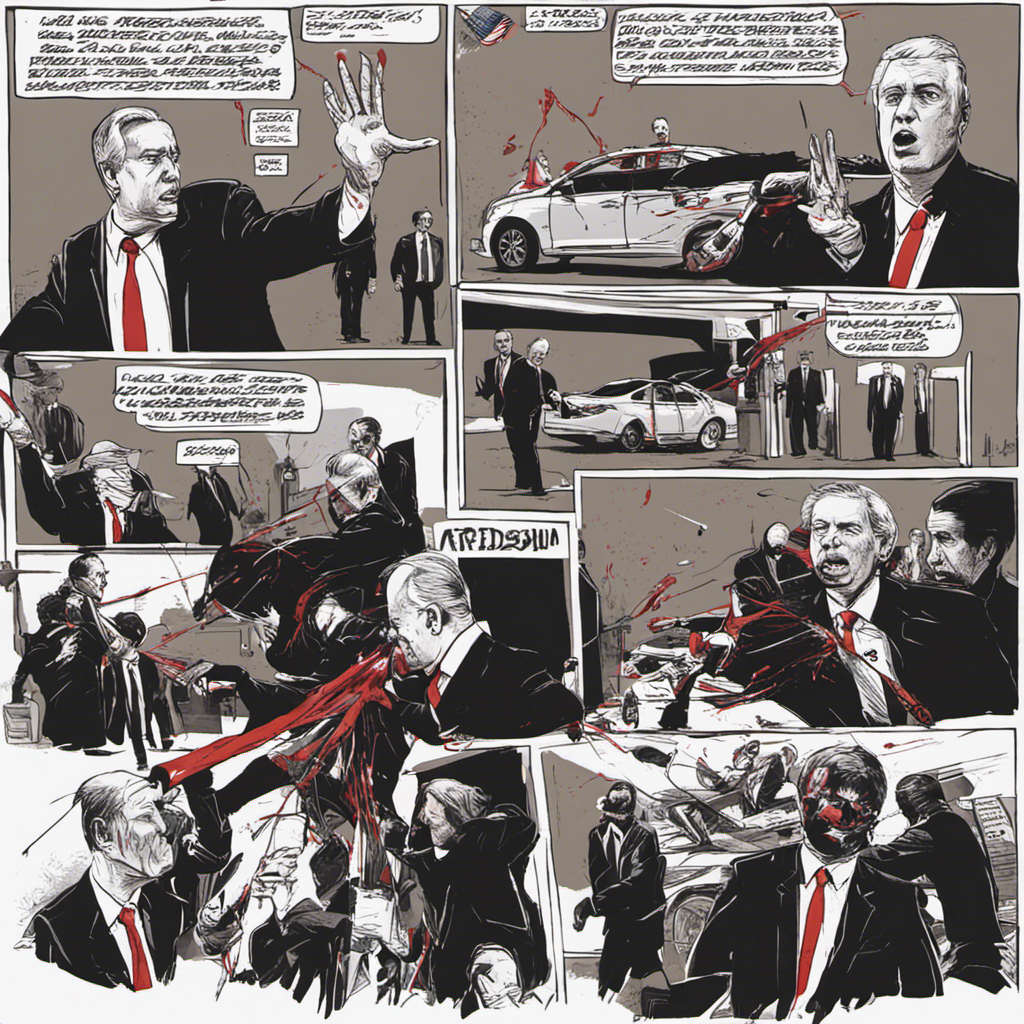

In [25]:
import uuid
from PIL import Image
from io import BytesIO
from base64 import b64encode
from base64 import b64decode
from IPython.display import display

modelId = 'stability.stable-diffusion-xl-v1'
prompt = """
Attempted assassination of the presidential candidate
"""
input = {
        'text_prompts': [{'text': prompt}],
        'cfg_scale': 10,
        'seed': 0,
        'steps': 50
    }
body = json.dumps(input) 
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response = json.loads(response.get('body').read())
images = response.get('artifacts')
for image in images:
    current = Image.open(BytesIO(b64decode(image.get('base64'))))
    filename = str(uuid.uuid4()) + '.png'
    current.save(filename)
    display(Image.open(filename))

In [26]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'amazon.titan-text-lite-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Product: Bicycle. 
Keywords: style, confortable

Create a table that contains five variations of a detailed product description for the product listed above, each variation of the product description must use all the keywords listed.
"""
input = {
        'inputText': prompt,
        'textGenerationConfig': {
              'maxTokenCount': 4096,
              'stopSequences': [],
              'temperature': 0,
              'topP': 1
        }
    }
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
results = response_body['results']
for result in results:
    print(result['outputText'])

|Variation|Description|
|-|-|
|Style|Our bicycles are made with style in mind, with sleek designs and eye-catching colors that will turn heads wherever you go. Whether you're a fan of classic or modern, we have a bike that's perfect for you.|
|Comfortable|We prioritize comfort in our bicycles, with ergonomic designs and adjustable features that ensure a smooth and enjoyable ride. Our bikes are built to withstand long distances and rough terrain, so you can enjoy your ride without any discomfort.|
|Durable|Our bicycles are built to last, with high-quality materials and sturdy construction. We use only the best components to ensure that your bike will withstand the test of time and provide you with years of riding pleasure.|
|Easy to Use|Our bicycles are designed with simplicity in mind, with intuitive controls and easy-to-use features that make it easy to get on the road and start riding. Whether you're a beginner or an experienced rider, you'll be able to navigate your bike with ease.|

In [27]:
#extract topics
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'ai21.j2-ultra'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Review: 
Extremely old cabinets, phone was half broken and full of dust. Bathroom door was broken, bathroom floor was dirty and yellow. Bathroom tiles were falling off. Asked to change my room and the next room was in the same conditions. The most out of date and least maintained hotel i ever been on.
Extracted sentiment:
{“Cleaning”: “Negative”, “Hotel Facilities”: “Negative”, “Room Quality”: “Negative”}
## 
Review: 
Great experience for two teenagers. We would book again. Location good. 
Extracted sentiment:
{“Location”: “Positive”}
## 
Review: 
Pool area was definitely a little run down and did not look like the pics online at all. Bathroom in the double room was kind of dumpy.
Extracted sentiment:
{“Pool”: “Negative”, “Room Quality”: “Negative”}
## 
Review: 
Roof top’s view is gorgeous and the lounge area is comfortable. The staff is very courteous and the location is great. The hotel is outdated and the shower need to be clean better. The air condition runs all the time and cannot be control by the temperature control setting. 
Extracted sentiment:
{“Cleaning”: “Negative”, “AC”: “Negative”, “Room Quality”: “Negative”, “Service”: “Positive”, “View”: “Positive”, “Hotel Facilities”: “Positive”}
## 
Review: 
First I was placed near the elevator where it was noises, the TV is not updated, the toilet was coming on and off. There was no temp control and my shower curtain smelled moldy. Not sure what happened to this place but only thing was a great location.
Extracted sentiment:
{“Cleaning”: “Negative”, “AC”: “Negative”, “Room Quality”: “Negative”, “Location”: “Positive”}
## 
Review: 
This is a very well located hotel and it’s nice and clean. Would stay here again. 
Extracted sentiment:
{“Cleaning”: “Positive”, “Location”: “Positive”}
## 
Review: 
Hotel is horrendous. The room was dark and dirty. No toilet paper in the bathroom. Came here on a work trip and had zero access to WiFi even though their hotel claims to have WiFi service. I will NEVER return.
Extracted sentiment:
{“Cleaning”: “Negative”, “WiFi”: “Negative”, “Room Quality”: “Negative”, “Service”: “Negative”}
## 
Review: 
The rooms are small but clean and comfortable. The front desk was really busy and the lines for check-in were very long but the staff handled each person in a professional and very pleasant way. We will stay there again. 
Extracted sentiment:
{“Cleaning”: “Positive”, “Service”: “Positive”}
## 
Review: 
The stay was very nice would stay again. The pool closes at 7 pm and doesn’t open till 11am m. That sucked. Also our wifi went out the entire last day we were there. Thats sucked too. Overall was a nice enough stay and I love the location.
Extracted sentiment:
"""
input = {
    'prompt': prompt, 
    'maxTokens': 50,
    'temperature': 0,
    'topP': 0.5,
    'stopSequences': [],
    'countPenalty': {'scale': 0},
    'presencePenalty': {'scale': 0},
    'frequencyPenalty': {'scale': 0}
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
completions = response_body['completions']
for part in completions:
    print(part['data']['text'])

{“Cleaning”: “Positive”, “Pool”: “Negative”, “WiFi”: “Negative”, “Location”: “Positive”}
The sentiment analysis of the reviews is as follows:

* Review 1:


